In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
pl.rcParams['figure.figsize']=[8,5]
pl.rcParams['font.size']=14
pl.rcParams['font.weight']='bold'
pl.style.use('seaborn-whitegrid')


In [33]:
df=pd.read_csv('D:/abhipraja/codes/dataset/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df['age'].max()

64

In [36]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [37]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [38]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'charge vs bmi')

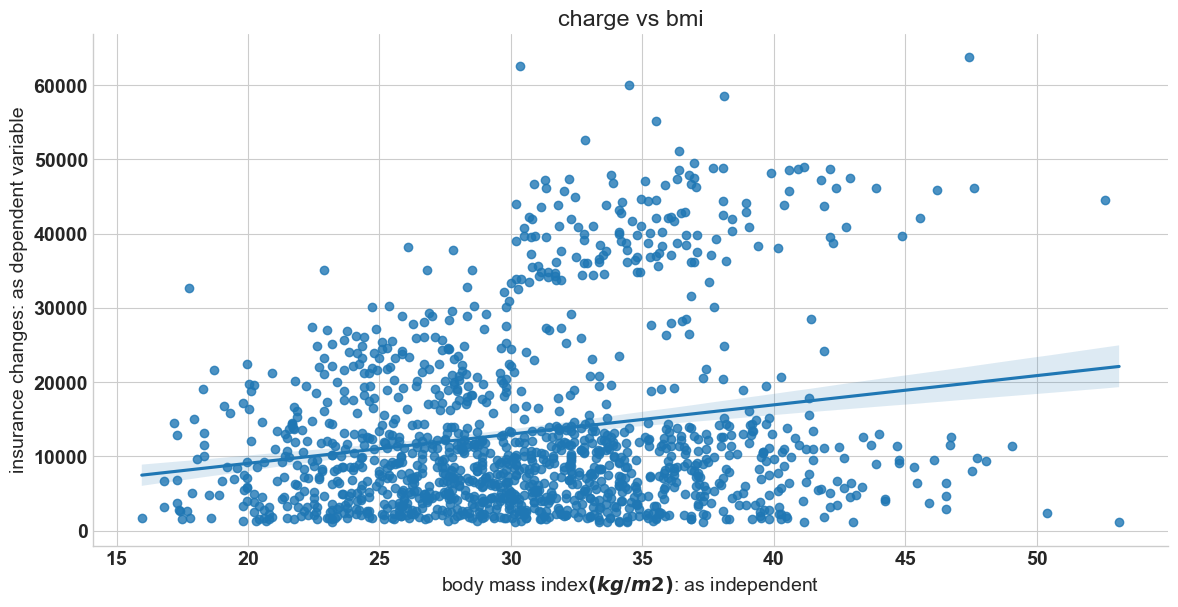

In [39]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
pl.xlabel('body mass index$(kg/m2)$: as independent ')
pl.ylabel('insurance changes: as dependent variable')
pl.title('charge vs bmi')

In [40]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'missing value in dataset')

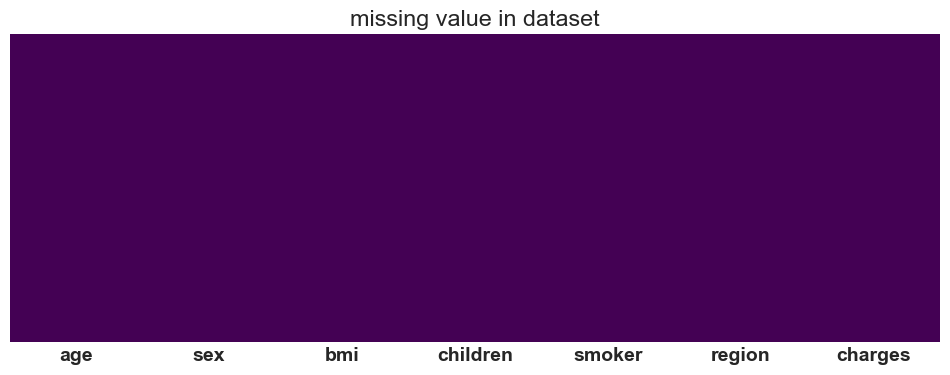

In [41]:
pl.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
pl.title('missing value in dataset')

<AxesSubplot:>

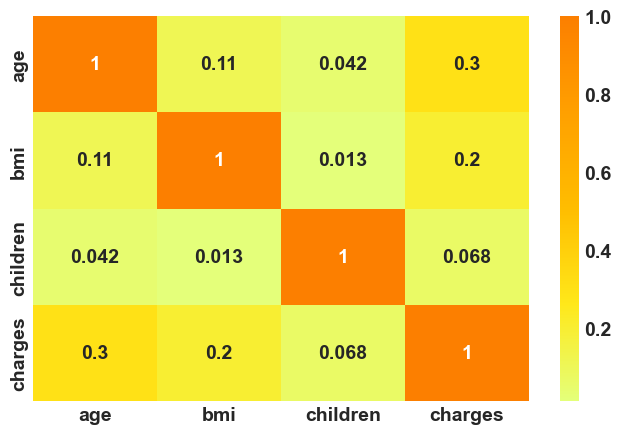

In [42]:
corr=df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


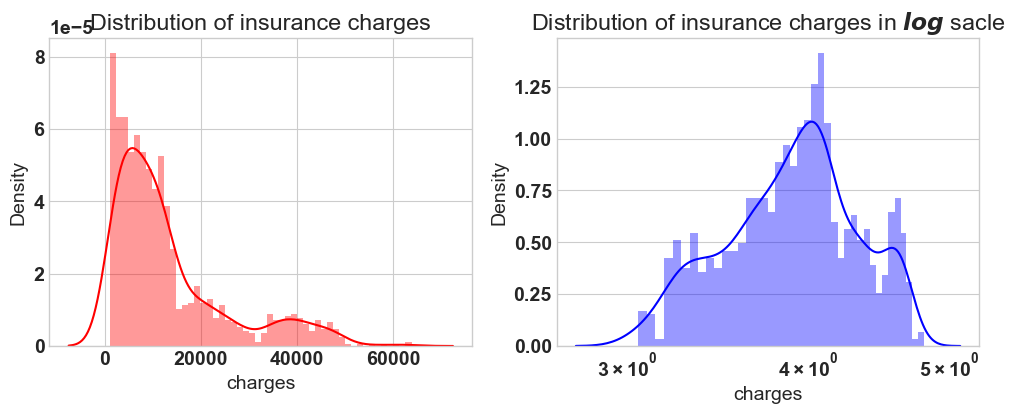

In [43]:
f= pl.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

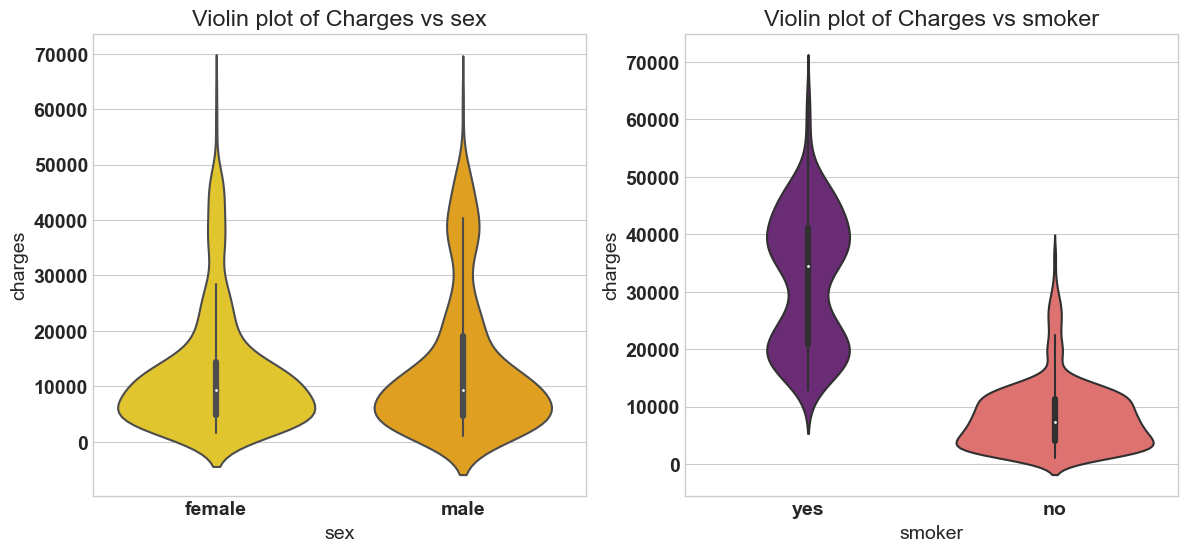

In [44]:
f = pl.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Text(0.5, 1.0, 'box plot of charges vs children')

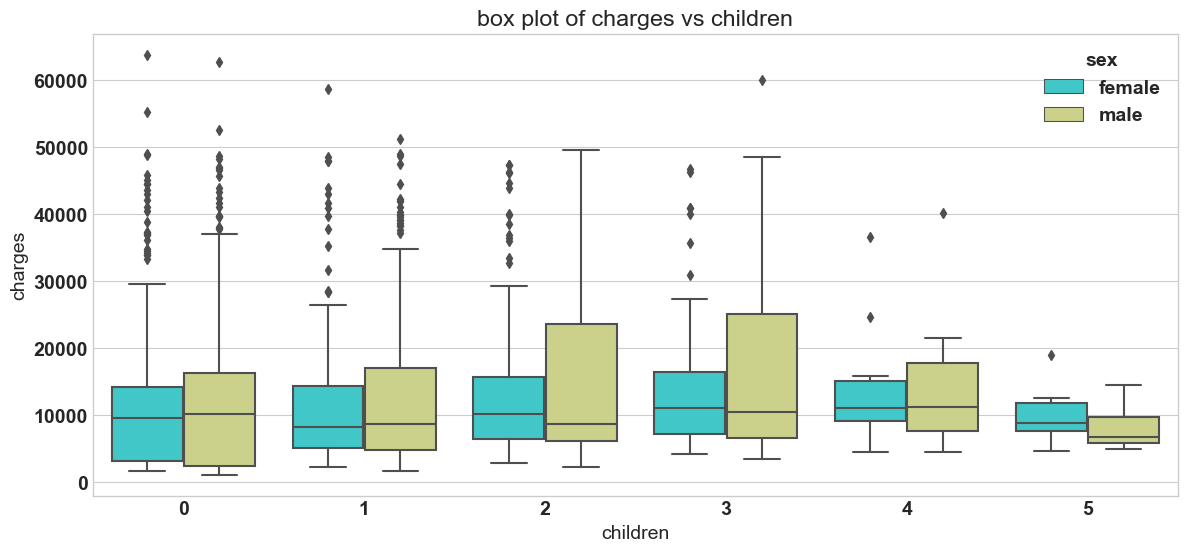

In [45]:
pl.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges',hue='sex',data=df,palette='rainbow')
pl.title('box plot of charges vs children')

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.groupby('children').agg(['mean','min','max'])['charges']

C:\Users\abhip\AppData\Local\Temp\ipykernel_18192\2881019953.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean','min','max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


In [48]:
df['children'].min()

0

Text(0.5, 1.0, 'volin plot of charges vs children')

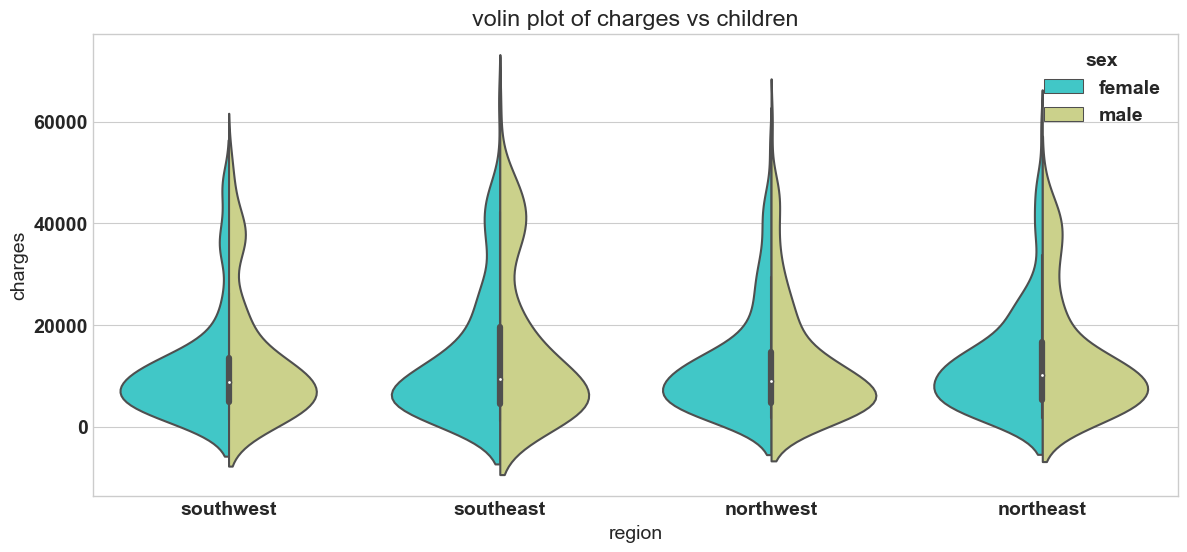

In [49]:
pl.figure(figsize=(14,6))
sns.violinplot(x='region',y='charges',hue='sex',data=df,palette='rainbow',split=True)
pl.title('volin plot of charges vs children')

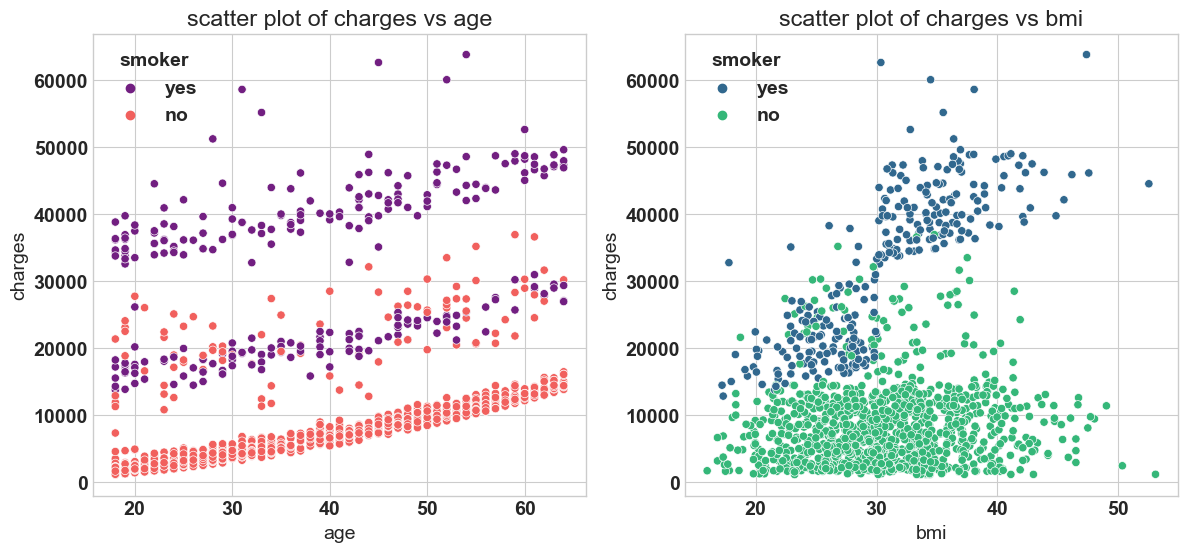

In [50]:
f=pl.figure(figsize=(14,6))
ax=f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('scatter plot of charges vs age')

ax=f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('scatter plot of charges vs bmi')
pl.savefig('sc.png')

In [51]:
categoricalColumns=['sex','children','smoker','region']
dfEncode=pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',columns=categoricalColumns,drop_first=True,dtype='int8')

In [52]:
print('columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',dfEncode.columns.values)
print('\nNumber of rows and columns in the dataset:',dfEncode.shape)

columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [53]:
from scipy.stats import boxcox
y_bc,lam,ci=boxcox(dfEncode['charges'],alpha=0.05)
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [54]:
dfEncode['charges']=np.log(dfEncode['charges'])

In [55]:
from random import random
from sklearn.model_selection import train_test_split
x=dfEncode.drop('charges',axis=1)
y=dfEncode['charges']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=23)

In [56]:
xtrain0=np.c_[np.ones((xtrain.shape[0],1)),xtrain]
xtest0=np.c_[np.ones((xtest.shape[0],1)),xtest]
theta=np.matmul(np.linalg.inv(np.matmul(xtrain0.T,xtrain0)),np.matmul(xtrain0.T,ytrain))

In [57]:
parameter=['theta'+str(i) for i in range(xtrain0.shape[1])]
columns=['intersect:x_0=1']+list(x.columns.values)
parameter_df=pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)

skTheta=[lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df=parameter_df.join(pd.Series(skTheta,name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta0,intersect:x_0=1,7.059171,7.059171
1,theta1,age,0.033134,0.033134
2,theta2,bmi,0.013517,0.013517
3,theta3,OHE_male,-0.067767,-0.067767
4,theta4,OHE_1,0.149457,0.149457
5,theta5,OHE_2,0.272919,0.272919
6,theta6,OHE_3,0.244095,0.244095
7,theta7,OHE_4,0.523339,0.523339
8,theta8,OHE_5,0.466030,0.466030
9,theta9,OHE_yes,1.550481,1.550481


In [59]:
yPredNorm=np.matmul(xtest0,theta)
jMse=np.sum((yPredNorm-ytest)**2)/xtest0.shape[0]

sse=np.sum((yPredNorm-ytest)**2)
sst=np.sum((ytest-ytest.mean())**2)
rSquare=1-(sse/sst)
print('the mean square error mse or j(theta) is',jMse)
print('r square obtian for normal equation method is',rSquare)

the mean square error mse or j(theta) is 0.1872962232298195
r square obtian for normal equation method is 0.7795687545055312


In [60]:
yPredSk=lin_reg.predict(xtest)
from sklearn.metrics import mean_squared_error
jMseSk=mean_squared_error(yPredSk,ytest)
rSquareSk=lin_reg.score(xtest,ytest)
print('the mean sqaure error of j theta is:',jMseSk)
print('r square obtain for scikit learn library is:',rSquareSk)

the mean sqaure error of j theta is: 0.1872962232298189
r square obtain for scikit learn library is: 0.7795687545055319


c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


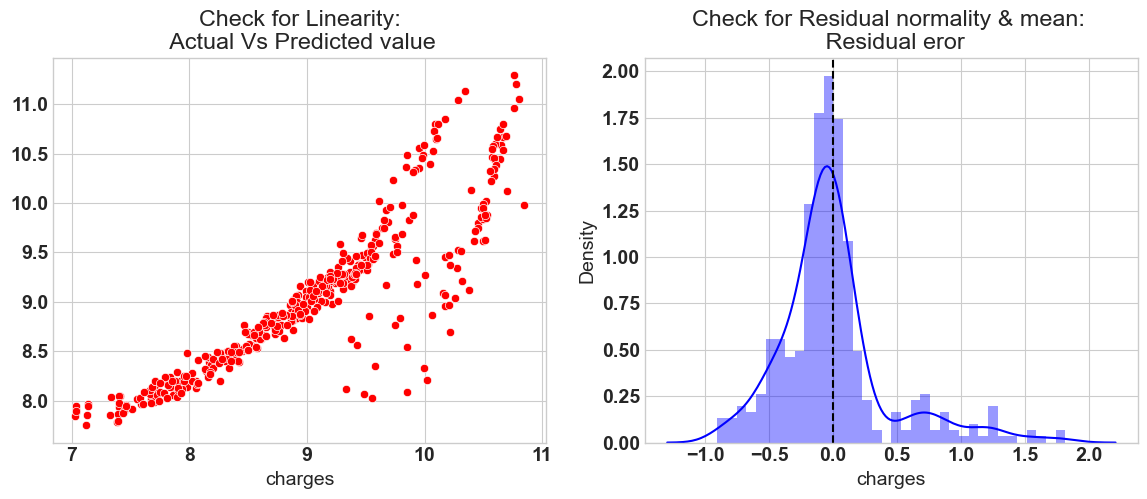

In [62]:
f = pl.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(ytest,yPredSk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((ytest - yPredSk),ax=ax,color='b')
ax.axvline((ytest - yPredSk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

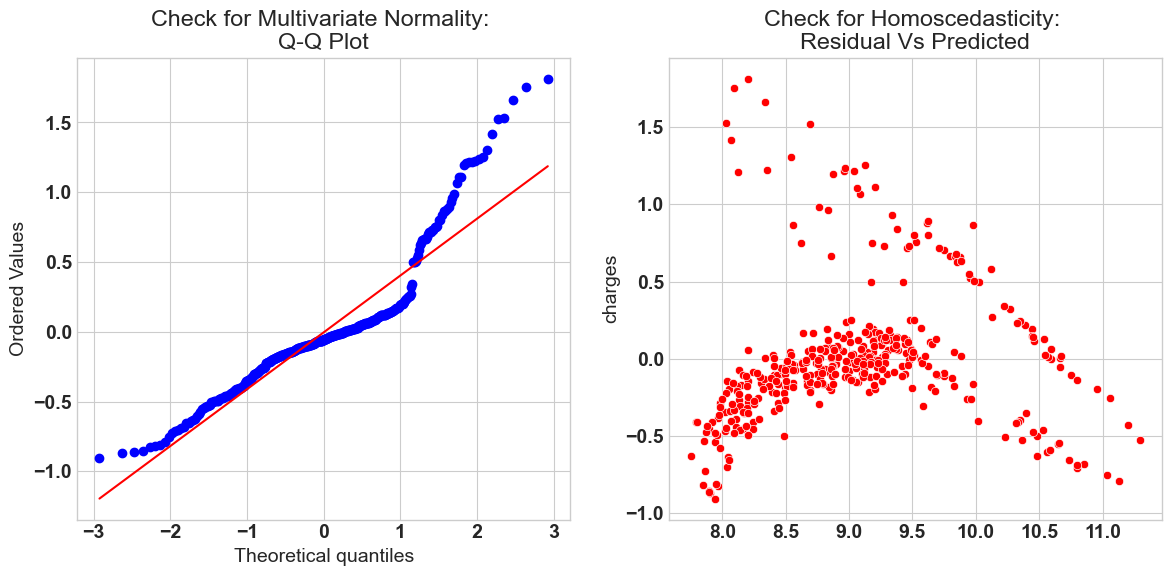

In [64]:
f,ax=pl.subplots(1,2,figsize=(14,6))
import scipy as sp

_,(_,_,r)= sp.stats.probplot((ytest - yPredSk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (ytest - yPredSk), x= yPredSk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [65]:
vir=1/(1-rSquareSk)
vir

4.536561945911138